In [105]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
denver_raw = pd.read_csv('../data/i-25-denver, colorado, usa-air-quality.csv')

In [3]:
denver_raw.head()

,date,pm25,pm10,o3,no2,so2,co
0,2020/4/2,22,4,10,4,,1
1,2020/4/3,16,13,15,6,,1
2,2020/4/4,35,10,15,5,,1
3,2020/4/5,24,8,17,6,,2
4,2020/4/6,20,,,,,


In [4]:
denver_raw.describe()

,date,pm25,pm10,o3,no2,so2,co
count,1790,1790,1790,1790,1790,1790,1790
unique,1790,94,68,31,27,4,17
top,2016/7/24,25,21,,10,,3
freq,1,61,88,1120,204,1740,591


In [5]:
denver_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1790 entries, 0 to 1789
Data columns (total 7 columns):
date     1790 non-null object
 pm25    1790 non-null object
 pm10    1790 non-null object
 o3      1790 non-null object
 no2     1790 non-null object
 so2     1790 non-null object
 co      1790 non-null object
dtypes: object(7)
memory usage: 98.0+ KB


In [22]:
denver_raw[' pm25']

0        22
1        16
2        35
3        24
4        20
       ... 
1785       
1786       
1787       
1788       
1789       
Name:  pm25, Length: 1790, dtype: object

In [12]:
denver_raw['date']= pd.to_datetime(denver_raw['date'])

In [13]:
type(denver_raw['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
denver_raw['date'].min()

Timestamp('2014-09-01 00:00:00')

In [17]:
denver_raw['date'].max()

Timestamp('2020-04-06 00:00:00')

In [26]:
denver_sorted = denver_raw.sort_values('date')

TypeError: arange: scalar arguments expected instead of a tuple.

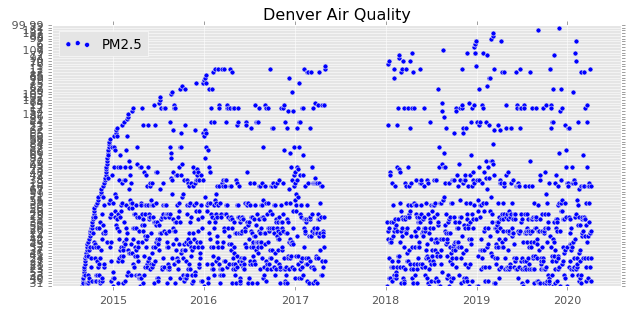

In [47]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.scatter(denver_sorted['date'], denver_sorted[' pm25'], label = "PM2.5" )
ax.set_title('Denver Air Quality')
ax.set_ylim(0, (denver_sorted[' pm25'].max()*2))
ax.legend(loc='best')
fig.tight_layout(pad=1)
plt.xticks(np.arange(0, (denver_sorted[' pm25'].max(), 20)))


In [49]:
(denver_sorted[' pm25'].max())

' 99'

In [51]:
type(denver_sorted[' pm25'][0])

str

In [53]:
denver_sorted['pm25'] = pd.to_numeric(denver_sorted[' pm25'])

ValueError: Unable to parse string " " at position 0

In [54]:
denver_sorted.head()

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,,15,,6,,2
1737,2014-09-02,31,26,,10,,4
1738,2014-09-03,35,27,,12,,4
1739,2014-09-04,31,39,,11,,3
1740,2014-09-05,40,,,8,,4


In [67]:
denver_nan = denver_sorted.replace(" ", np.NaN)

In [69]:
denver_nan.head(100)

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,NaN,15,NaN,6,NaN,2
1737,2014-09-02,31,26,NaN,10,NaN,4
1738,2014-09-03,35,27,NaN,12,NaN,4
1739,2014-09-04,31,39,NaN,11,NaN,3
1740,2014-09-05,40,NaN,NaN,8,NaN,4
...,...,...,...,...,...,...,...
1712,2014-12-05,73,38,NaN,17,NaN,6
1713,2014-12-06,45,42,NaN,16,NaN,10
1714,2014-12-07,63,22,NaN,15,NaN,7
1715,2014-12-08,36,59,NaN,21,NaN,12


In [72]:
denver_nan['pm25'] = pd.to_numeric(denver_nan[' pm25'])

In [73]:
denver_nan['pm10'] = pd.to_numeric(denver_nan[' pm10'])

In [74]:
denver_nan['o3'] = pd.to_numeric(denver_nan[' o3'])

In [75]:
denver_nan['no2'] = pd.to_numeric(denver_nan[' no2'])

In [76]:
denver_nan['so2'] = pd.to_numeric(denver_nan[' so2'])

In [77]:
denver_nan['co'] = pd.to_numeric(denver_nan[' co'])

In [82]:
denver_clean = denver_nan.drop(' pm25', axis = 1).drop(' pm10', axis = 1).drop(' o3', axis = 1).drop(' no2', axis = 1).drop(' so2', axis = 1).drop(' co', axis = 1)

In [83]:
denver_clean.head()

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,NaN,15.0,NaN,6.0,NaN,2.0
1737,2014-09-02,31.0,26.0,NaN,10.0,NaN,4.0
1738,2014-09-03,35.0,27.0,NaN,12.0,NaN,4.0
1739,2014-09-04,31.0,39.0,NaN,11.0,NaN,3.0
1740,2014-09-05,40.0,NaN,NaN,8.0,NaN,4.0


In [84]:
denver_clean.head(-5)

,date,pm25,pm10,o3,no2,so2,co
1781,2014-09-01,NaN,15.0,NaN,6.0,NaN,2.0
1737,2014-09-02,31.0,26.0,NaN,10.0,NaN,4.0
1738,2014-09-03,35.0,27.0,NaN,12.0,NaN,4.0
1739,2014-09-04,31.0,39.0,NaN,11.0,NaN,3.0
1740,2014-09-05,40.0,NaN,NaN,8.0,NaN,4.0
...,...,...,...,...,...,...,...
31,2020-03-28,34.0,11.0,18.0,4.0,NaN,1.0
32,2020-03-29,16.0,4.0,17.0,5.0,NaN,1.0
33,2020-03-30,11.0,16.0,16.0,8.0,NaN,2.0
34,2020-03-31,21.0,23.0,18.0,7.0,NaN,1.0


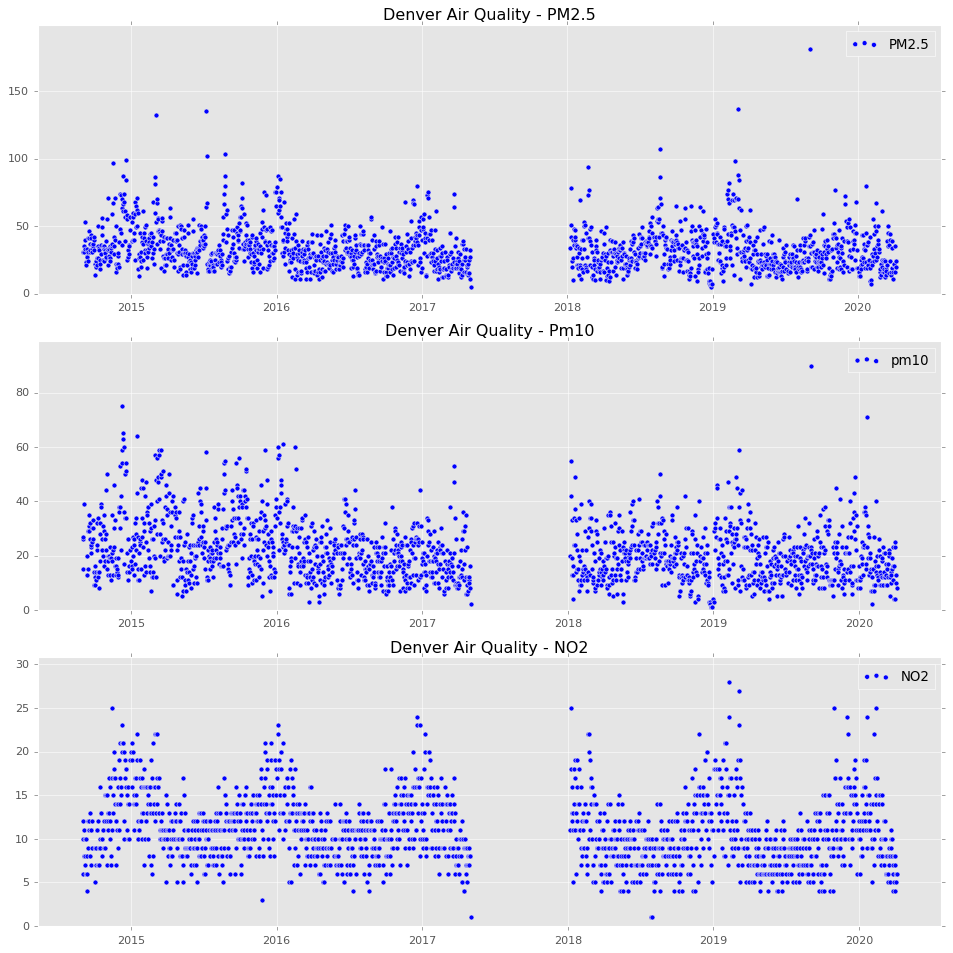

In [104]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(3,1,1)
ax.scatter(denver_clean['date'], denver_clean['pm25'], label = "PM2.5" )
ax.set_title('Denver Air Quality - PM2.5')
ax.set_ylim(0, (denver_clean['pm25'].max()*1.1))
ax.legend(loc='best')
fig.tight_layout(pad=1)
ax = fig.add_subplot(3,1,2)
ax.scatter(denver_clean['date'], denver_clean['pm10'], label = "pm10" )
ax.set_title('Denver Air Quality - Pm10')
ax.set_ylim(0, (denver_clean['pm10'].max()*1.1))
ax.legend(loc='best')
fig.tight_layout(pad=1)
ax = fig.add_subplot(3,1,3)
ax.scatter(denver_clean['date'], denver_clean['no2'], label = "NO2" )
ax.set_title('Denver Air Quality - NO2')
ax.set_ylim(0, (denver_clean['no2'].max()*1.1))
ax.legend(loc='best')
fig.tight_layout(pad=1)

In [113]:
denverq1_16 = denver_clean[denver_clean['date'] > datetime.datetime(2016, 1, 1)]

In [114]:
denverq1_16 = denverq1_16[denverq1_16['date'] < datetime.datetime(2016, 4, 1)]

In [116]:
denverq1_16.head(-1)

,date,pm25,pm10,o3,no2,so2,co
1778,2016-01-03,NaN,34.0,NaN,17.0,NaN,10.0
1376,2016-01-04,60.0,60.0,NaN,23.0,NaN,13.0
1196,2016-01-05,87.0,56.0,NaN,22.0,NaN,14.0
1197,2016-01-06,71.0,57.0,NaN,19.0,NaN,9.0
1198,2016-01-07,62.0,36.0,NaN,18.0,NaN,7.0
...,...,...,...,...,...,...,...
1277,2016-03-26,27.0,12.0,NaN,7.0,NaN,3.0
1278,2016-03-27,38.0,8.0,NaN,8.0,NaN,3.0
1279,2016-03-28,16.0,31.0,NaN,16.0,NaN,5.0
1280,2016-03-29,38.0,32.0,NaN,12.0,NaN,4.0


In [118]:
len(denverq1_16)

89

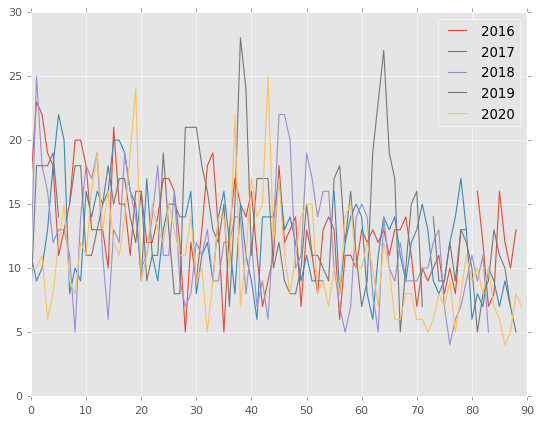

In [121]:
years = [2016, 2017, 2018, 2019, 2020]

fig, ax = plt.subplots(figsize=(8,6))
for year in years:
    denverq = denver_clean[denver_clean['date'] > datetime.datetime(year, 1, 1)]
    denverq = denverq[denverq['date'] < datetime.datetime(year, 4, 1)]
    x = np.arange(0, len(denverq), 1)
    y = denverq['no2']
    ax.plot(x, y, label = str(year))
ax.legend(loc='best')
    


In [108]:
x = datetime.datetime(2018, 6, 1)

print(x.strftime("%B"))

June


In [109]:
import datetime

x = datetime.datetime(2020, 5, 17)

print(x)

2020-05-17 00:00:00
